In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import platform
import PIL
from collections import Counter
import seaborn as sns

## 파일 불러오기 및 데이터 전처리

In [27]:
data = pd.read_csv('./data/Video_Games.csv')
data.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# 데이터 컬럼 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [29]:
# User_Score 컬럼 빈도 확인
Counter(data['User_Score']).most_common

<bound method Counter.most_common of Counter({nan: 6704, 'tbd': 2425, '7.8': 324, '8': 290, '8.2': 282, '8.3': 254, '8.5': 253, '7.5': 251, '7.9': 249, '8.1': 244, '7.7': 240, '7.3': 236, '8.4': 223, '7': 220, '7.6': 220, '7.4': 215, '8.6': 211, '6.8': 197, '8.7': 188, '8.8': 186, '7.1': 180, '7.2': 167, '8.9': 153, '6.6': 148, '6.9': 143, '6.3': 138, '6.7': 128, '6': 127, '6.5': 125, '9': 120, '6.2': 113, '6.4': 107, '5.8': 97, '9.1': 90, '6.1': 84, '5.7': 78, '5.9': 77, '5.4': 72, '5.6': 72, '5.5': 71, '5.3': 70, '5': 64, '5.2': 57, '4.8': 49, '5.1': 44, '9.2': 43, '4.9': 40, '4.3': 37, '4.6': 37, '4.5': 34, '4.1': 33, '4.4': 33, '9.3': 31, '4.2': 28, '3.8': 28, '4': 27, '3.5': 26, '4.7': 24, '2.8': 24, '3.4': 23, '3.1': 23, '3': 21, '3.6': 20, '3.7': 19, '3.3': 15, '3.2': 13, '3.9': 13, '2.5': 12, '9.4': 11, '2': 11, '2.4': 11, '2.9': 9, '2.1': 9, '1.7': 9, '2.7': 8, '2.2': 6, '9.5': 6, '1.8': 6, '1.4': 5, '2.6': 4, '1.6': 3, '1.2': 3, '1.9': 2, '9.6': 2, '1.1': 2, '0.3': 2, '1.5': 

In [30]:
# 이상치(tbd) 변환
data['User_Score'] = data['User_Score'].replace('tbd', np.NaN)
# replace 잘 됐는지 확인
Counter(data['User_Score']).most_common
# User_Score float로 형 변환
data['User_Score'] = data['User_Score'].astype('float')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [32]:
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [33]:
# 출시년도 결측치 확인
Counter(data['Year_of_Release']).most_common
# 출시년도 결측치 최저값으로 변환
data['Year_of_Release'] = data['Year_of_Release'].fillna(1980)
# replace 잘 됐는지 확인 / 형변환
Counter(data['Year_of_Release']).most_common
data['Year_of_Release'].astype('int')

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16714    2016
16715    2006
16716    2016
16717    2003
16718    2016
Name: Year_of_Release, Length: 16719, dtype: int32

In [34]:
# 장르 결측치 확인
Counter(data['Genre']).most_common
# 출판사 결측치 확인
Counter(data['Publisher']).most_common
data['Publisher'].isnull().sum()

54

In [35]:
# rating 빈도 확인
Counter(data['Rating']).most_common

<bound method Counter.most_common of Counter({nan: 6769, 'E': 3991, 'T': 2961, 'M': 1563, 'E10+': 1420, 'EC': 8, 'K-A': 3, 'RP': 3, 'AO': 1})>

In [36]:
# 출판사 컬럼 결측치 변환
data['Publisher'] = data['Publisher'].replace(np.NaN, 'None')

In [37]:
# 평점 컬럼 결측치 최저치로 변환 
data['Critic_Score'] = data['Critic_Score'].replace(np.NaN, data['Critic_Score'].min())
data['Critic_Count'] = data['Critic_Count'].replace(np.NaN, data['Critic_Count'].min())
data['User_Score'] = data['User_Score'].replace(np.NaN, data['User_Score'].min())
data['User_Count'] = data['User_Count'].replace(np.NaN, data['User_Count'].min())
# 필요없는 컬럼 삭제
data.drop(['Developer'],axis=1,inplace=True)
data.drop(['Rating'],axis=1,inplace=True)
data.drop(['Name'],axis=1,inplace=True)
# 결측치 제거
data.dropna(axis=0,inplace=True)

In [38]:
# 결측치 제거 확인
data.isnull().sum()

Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
dtype: int64

In [39]:
data['NA_Sales'] = data['NA_Sales'] / (2023-data['Year_of_Release']) 
data['EU_Sales'] = data['EU_Sales'] / (2023-data['Year_of_Release'])
data['JP_Sales'] = data['JP_Sales'] / (2023-data['Year_of_Release'])
data['Other_Sales'] = data['Other_Sales'] / (2023-data['Year_of_Release'])
data['Global_Sales'] = data['Global_Sales'] / (2023-data['Year_of_Release'])

In [40]:
data.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii,2006.0,Sports,Nintendo,2.432941,1.703529,0.221765,0.497059,4.854706,76.0,51.0,8.0,322.0
1,NES,1985.0,Platform,Nintendo,0.765263,0.094211,0.179211,0.020263,1.058947,13.0,3.0,0.0,4.0
2,Wii,2008.0,Racing,Nintendo,1.045333,0.850667,0.252667,0.219333,2.368000,82.0,73.0,8.3,709.0
3,Wii,2009.0,Sports,Nintendo,1.115000,0.780714,0.234286,0.210714,2.340714,80.0,73.0,8.0,192.0
4,GB,1996.0,Role-Playing,Nintendo,0.417407,0.329259,0.378519,0.037037,1.161852,13.0,3.0,0.0,4.0


### 더미화 전 스케일링

In [45]:
data2 = data.drop(['Platform','Year_of_Release','Genre','Publisher'],axis=1,inplace=False)
data2

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,2.432941,1.703529,0.221765,0.497059,4.854706,76.0,51.0,8.0,322.0
1,0.765263,0.094211,0.179211,0.020263,1.058947,13.0,3.0,0.0,4.0
2,1.045333,0.850667,0.252667,0.219333,2.368000,82.0,73.0,8.3,709.0
3,1.115000,0.780714,0.234286,0.210714,2.340714,80.0,73.0,8.0,192.0
4,0.417407,0.329259,0.378519,0.037037,1.161852,13.0,3.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...
16714,0.000000,0.000000,0.001429,0.000000,0.001429,13.0,3.0,0.0,4.0
16715,0.000000,0.000588,0.000000,0.000000,0.000588,13.0,3.0,0.0,4.0
16716,0.000000,0.000000,0.001429,0.000000,0.001429,13.0,3.0,0.0,4.0
16717,0.000500,0.000000,0.000000,0.000000,0.000500,13.0,3.0,0.0,4.0


In [42]:
#표준화 전처리 과정
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit_transform(data2)
pd.DataFrame(ss.fit_transform(data2),columns=data2.columns)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,49.436652,46.546149,11.922889,38.525374,48.001879,1.207387,2.074810,1.291827,0.637231
1,15.318812,2.314890,9.587342,1.321177,10.203183,-0.919856,-0.644089,-0.877022,-0.185974
2,21.048569,23.105678,13.618914,16.854552,23.238913,1.409981,3.320973,1.373159,1.639057
3,22.473829,21.183074,12.610093,16.182011,22.967198,1.342450,3.320973,1.291827,0.300701
4,8.202278,8.775077,20.526176,2.630037,11.227921,-0.919856,-0.644089,-0.877022,-0.185974
...,...,...,...,...,...,...,...,...,...
16712,-0.337164,-0.274435,-0.170055,-0.259950,-0.327737,-0.919856,-0.644089,-0.877022,-0.185974
16713,-0.337164,-0.258268,-0.248461,-0.259950,-0.336105,-0.919856,-0.644089,-0.877022,-0.185974
16714,-0.337164,-0.274435,-0.170055,-0.259950,-0.327737,-0.919856,-0.644089,-0.877022,-0.185974
16715,-0.326934,-0.274435,-0.248461,-0.259950,-0.336984,-0.919856,-0.644089,-0.877022,-0.185974


In [46]:
df1 = data[['Platform','Genre','Publisher']]
df2 = pd.DataFrame(ss.fit_transform(data2),columns=data2.columns)
pd.concat([df1,df2],axis=1).isna().sum()
data2 = pd.concat([df1,df2],axis=1)
data2
# na값 제거 : 병합하면서 na값이 생김. 왜 생겼는지 모르겠다....
data2.dropna(axis=0,inplace=True)

In [47]:
data2

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii,Sports,Nintendo,49.436652,46.546149,11.922889,38.525374,48.001879,1.207387,2.074810,1.291827,0.637231
1,NES,Platform,Nintendo,15.318812,2.314890,9.587342,1.321177,10.203183,-0.919856,-0.644089,-0.877022,-0.185974
2,Wii,Racing,Nintendo,21.048569,23.105678,13.618914,16.854552,23.238913,1.409981,3.320973,1.373159,1.639057
3,Wii,Sports,Nintendo,22.473829,21.183074,12.610093,16.182011,22.967198,1.342450,3.320973,1.291827,0.300701
4,GB,Role-Playing,Nintendo,8.202278,8.775077,20.526176,2.630037,11.227921,-0.919856,-0.644089,-0.877022,-0.185974
...,...,...,...,...,...,...,...,...,...,...,...,...
16712,GBA,Platform,Kemco,-0.337164,-0.274435,-0.170055,-0.259950,-0.327737,-0.919856,-0.644089,-0.877022,-0.185974
16713,PS2,Racing,Activision,-0.337164,-0.258268,-0.248461,-0.259950,-0.336105,-0.919856,-0.644089,-0.877022,-0.185974
16714,PS3,Action,Tecmo Koei,-0.337164,-0.274435,-0.170055,-0.259950,-0.327737,-0.919856,-0.644089,-0.877022,-0.185974
16715,X360,Sports,Codemasters,-0.326934,-0.274435,-0.248461,-0.259950,-0.336984,-0.919856,-0.644089,-0.877022,-0.185974


In [48]:
data_dummies = pd.get_dummies(data2)
# data_dummies.drop(['Year_of_Release'],axis=1,inplace=True)
data_dummies

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_2600,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,49.436652,46.546149,11.922889,38.525374,48.001879,1.207387,2.074810,1.291827,0.637231,0,...,0,0,0,0,0,0,0,0,0,0
1,15.318812,2.314890,9.587342,1.321177,10.203183,-0.919856,-0.644089,-0.877022,-0.185974,0,...,0,0,0,0,0,0,0,0,0,0
2,21.048569,23.105678,13.618914,16.854552,23.238913,1.409981,3.320973,1.373159,1.639057,0,...,0,0,0,0,0,0,0,0,0,0
3,22.473829,21.183074,12.610093,16.182011,22.967198,1.342450,3.320973,1.291827,0.300701,0,...,0,0,0,0,0,0,0,0,0,0
4,8.202278,8.775077,20.526176,2.630037,11.227921,-0.919856,-0.644089,-0.877022,-0.185974,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16712,-0.337164,-0.274435,-0.170055,-0.259950,-0.327737,-0.919856,-0.644089,-0.877022,-0.185974,0,...,0,0,0,0,0,0,0,0,0,0
16713,-0.337164,-0.258268,-0.248461,-0.259950,-0.336105,-0.919856,-0.644089,-0.877022,-0.185974,0,...,0,0,0,0,0,0,0,0,0,0
16714,-0.337164,-0.274435,-0.170055,-0.259950,-0.327737,-0.919856,-0.644089,-0.877022,-0.185974,0,...,0,0,0,0,0,0,0,0,0,0
16715,-0.326934,-0.274435,-0.248461,-0.259950,-0.336984,-0.919856,-0.644089,-0.877022,-0.185974,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# 파일로 저장
data_dummies.to_csv('./data/Video_Games_edit.csv')

## 예측분석 모델링 만들기

In [2]:
vgdata = pd.read_csv('./data/Video_Games_edit.csv')
vgdata.head(5)

,Unnamed: 0,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,0,49.436652,46.546149,11.922889,38.525374,48.001879,1.207387,2.074810,1.291827,0.637231,...,0,0,0,0,0,0,0,0,0,0
1,1,15.318812,2.314890,9.587342,1.321177,10.203183,-0.919856,-0.644089,-0.877022,-0.185974,...,0,0,0,0,0,0,0,0,0,0
2,2,21.048569,23.105678,13.618914,16.854552,23.238913,1.409981,3.320973,1.373159,1.639057,...,0,0,0,0,0,0,0,0,0,0
3,3,22.473829,21.183074,12.610093,16.182011,22.967198,1.342450,3.320973,1.291827,0.300701,...,0,0,0,0,0,0,0,0,0,0
4,4,8.202278,8.775077,20.526176,2.630037,11.227921,-0.919856,-0.644089,-0.877022,-0.185974,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 독립변수(x=vg_input), 종속변수(y=vg_target) 만들기
vg_target = vgdata['Global_Sales']
vg_input = vgdata.drop(['Global_Sales','Unnamed: 0'],axis=1)
vg_input

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_2600,Platform_3DO,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,49.436652,46.546149,11.922889,38.525374,1.207387,2.074810,1.291827,0.637231,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.318812,2.314890,9.587342,1.321177,-0.919856,-0.644089,-0.877022,-0.185974,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21.048569,23.105678,13.618914,16.854552,1.409981,3.320973,1.373159,1.639057,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22.473829,21.183074,12.610093,16.182011,1.342450,3.320973,1.291827,0.300701,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.202278,8.775077,20.526176,2.630037,-0.919856,-0.644089,-0.877022,-0.185974,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,-0.337164,-0.274435,-0.170055,-0.259950,-0.919856,-0.644089,-0.877022,-0.185974,0,0,...,0,0,0,0,0,0,0,0,0,0
16711,-0.337164,-0.258268,-0.248461,-0.259950,-0.919856,-0.644089,-0.877022,-0.185974,0,0,...,0,0,0,0,0,0,0,0,0,0
16712,-0.337164,-0.274435,-0.170055,-0.259950,-0.919856,-0.644089,-0.877022,-0.185974,0,0,...,0,0,0,0,0,0,0,0,0,0
16713,-0.326934,-0.274435,-0.248461,-0.259950,-0.919856,-0.644089,-0.877022,-0.185974,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(vg_input,vg_target,test_size=0.1,random_state=42)

In [5]:
#표준화 전처리 과정
from sklearn.preprocessing import StandardScaler
# ss=StandardScaler()
# ss.fit(train_input)
# train_scaled=ss.transform(train_input)
# test_scaled=ss.transform(test_input)

train_scaled=train_input
test_scaled=test_input

In [6]:
#다중 회귀 모델을 이용하여 훈련 세트 결정계수 확인하기
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
#테스트 세트의 결정계수 확인하기
print(lr.score(test_scaled,test_target))

0.9999867792952959
-5655944842321.456


In [8]:
#준비한 train_scaled 데이터로 릿지 모델을 훈련하기
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
# 릿지 모델을 이용한 테스트 세트의 결정계수 확인하기
print(ridge.score(test_scaled,test_target))

0.9999867299685415
0.999987515282576


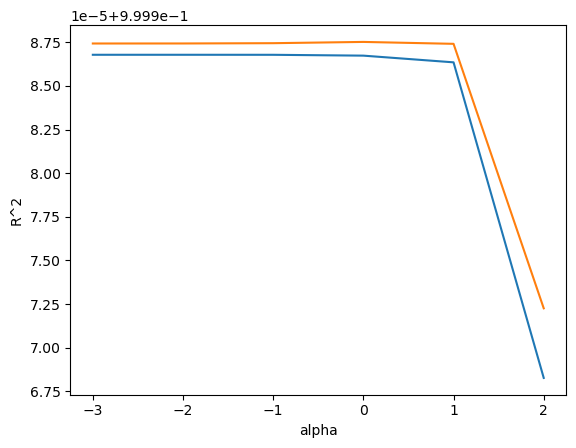

In [9]:
#alpha 값 찾기 / score() 메서드의 결과를 저장할 리스트 만들기
import matplotlib.pyplot as plt
train_score=[ ]
test_score=[ ]

#alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델 훈련하고 훈련 세트와 테스트 세트의 점수를 리스트에 저장
alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  #릿지 모델 만들기
  ridge=Ridge(alpha=alpha)
  #릿지 모델 훈련하기
  ridge.fit(train_scaled,train_target)
  #훈련세트와 테스트세트의 점수를 저장하기
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled,test_target))

#그래프 그리기
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [10]:
#릿지 최종 모델 만들기
ridge=Ridge(alpha=10)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9999863462986339
0.9999874060542856


ioc, iloc로 문제 해결

In [131]:
ridge.predict(train_scaled)
# ridge.predict(train_scaled.iloc[0].reshape(-1,633))

array([-0.2802987 ,  0.36029303, -0.08289973, ..., -0.21060928,
        0.59635833, -0.3274392 ])

In [132]:
train_target[0], train_target[1]

(48.001879466871735, 10.203183444121956)

In [133]:
len(train_scaled)

15043

In [134]:
train_target.iloc[0]
#train_target.sort_values(asecending=False)

-0.2806822119354931

In [135]:
train_target.loc[0]

48.001879466871735

In [136]:
test_target.iloc[0], test_target.iloc[1]

(0.0705884532165405, 0.0688102138680294)

In [137]:
#타깃과 예측한 값 사이의 차이 구하기
from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측을 만든다
test_prediction=ridge.predict(test_input)

#테스트 세트에 대한 평균 절댓값 오차를 계산한다
mae = mean_absolute_error(test_target,test_prediction)
print(mae)

0.001885003328735692


In [138]:
from sklearn.metrics import mean_squared_error , r2_score
#테스트 세트에 대한 예측을 만든다
test_prediction=ridge.predict(test_input)
# 실제값과 예측값의 차이를 제곱해서 평균한 평가지표
mse = mean_squared_error(test_target,test_prediction)
# rmse 계산 함수는 사이킷런이 지원하지 않기 때문에 np.sqrt(mse) 사용
rmse = np.sqrt(mse)
r2 = r2_score(test_target,test_prediction) # lr.score() 반환값과 같은 결과
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2))

MSE : 0.000 , RMSE : 0.004
Variance score : 1.000


In [139]:
#라쏘 회귀 
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
#라쏘 회귀를 이용한 테스트 세트 점수 확인
print(lasso.score(test_scaled,test_target))

0.0
-8.833390816587183e-07


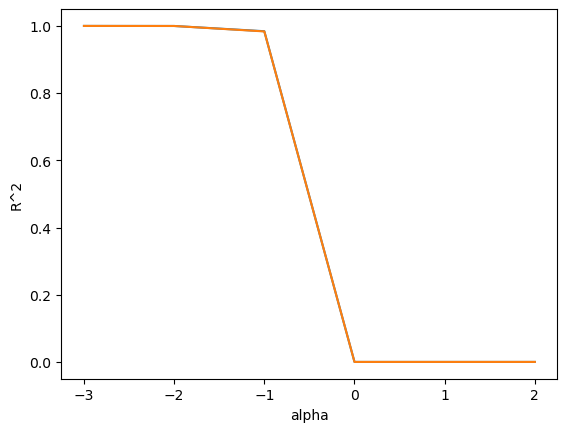

In [140]:
#alpha 값을 바꾸어 가며 라쏘 회귀 돌려보기
train_score=[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  #라쏘 모델 만들기
  lasso=Lasso(alpha=alpha, max_iter=10000)
  #라쏘 모델 훈련하기
  lasso.fit(train_scaled,train_target)
  #훈련 점수와 테스트 점수 저장하기
  train_score.append(lasso.score(train_scaled,train_target))
  test_score.append(lasso.score(test_scaled,test_target))

#train_score와 test_score 리스트를 사용해 그래프 그리기
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [141]:
#라쏘 최종 훈련하기
lasso=Lasso(alpha=0.1)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

#라쏘 모델의 계수 중 0인 것 찾기
print(np.sum(lasso.coef_==0))

0.9842200441312676
0.9836177902226118
629


In [142]:
# 회귀 계수의 시각화
def get_top_bottom_coef(model) :
    coef = pd.Series(model.coef_, index=vg_input.columns)
    
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    
    return coef_high, coef_low

# 모델별 회귀 계수 시각화 함수
# list 객체로 모델을 입력 받아서
# 모델별로 회귀 계수 상위 10개, 하위 10개 추출해서
# 가로 막대 그래프 형태로 출력
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__ +' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120) # 안쪽, 패딩값
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

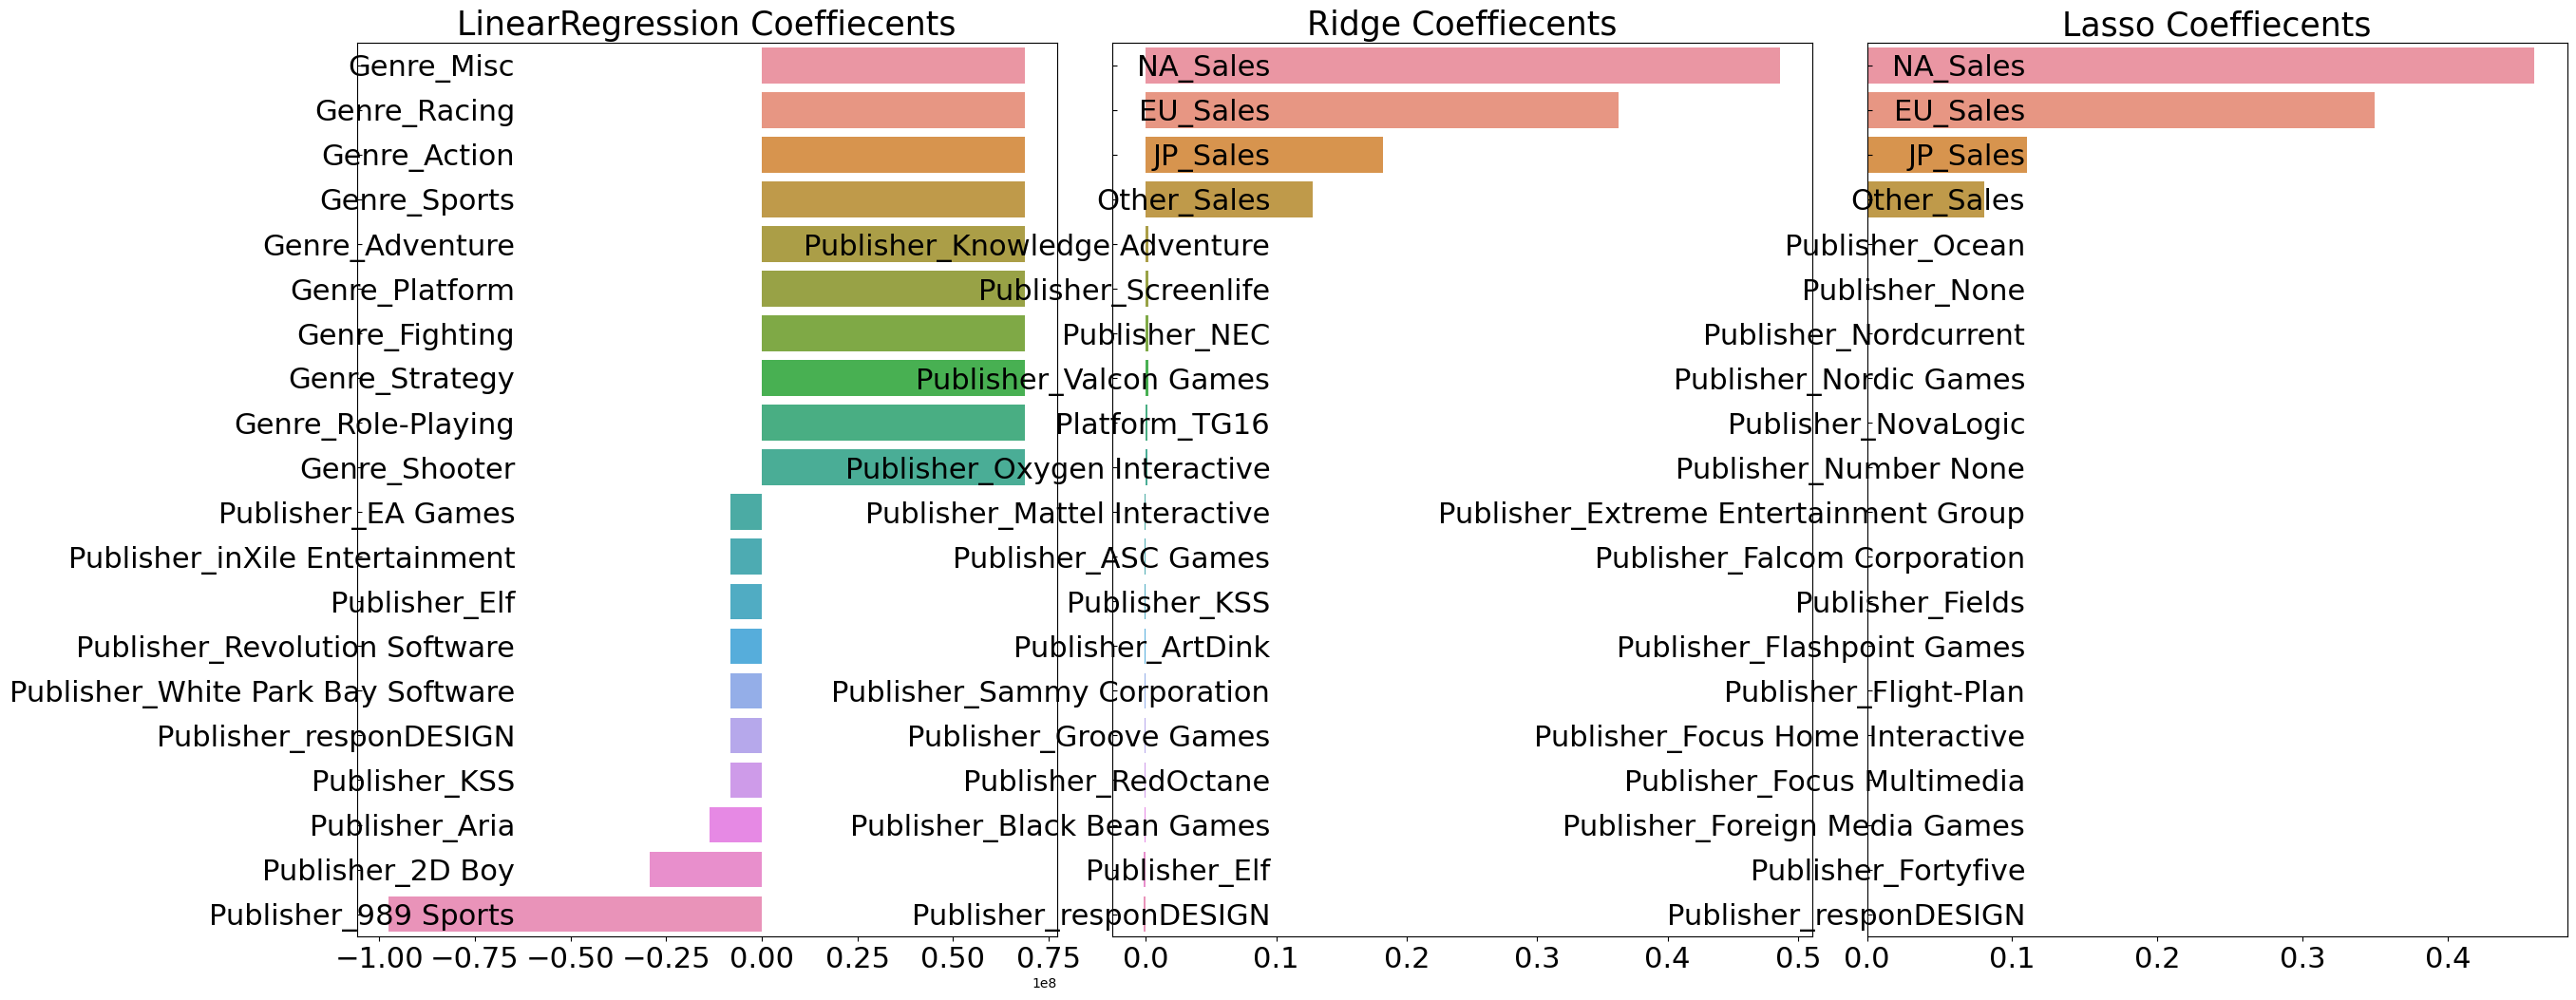

In [143]:
# 일반 선형 회귀
lr_reg = LinearRegression()
lr_reg.fit(train_scaled,train_target)
# 릿찌회귀
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(train_scaled,train_target)
# 라쏘 회귀
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(train_scaled,train_target)
# 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

- 오류남 

In [144]:
#교차 검증 함수를 이용하여 검증 세트 훈련하기
from sklearn.model_selection import cross_validate
scores = cross_validate(ridge_reg,train_input,train_target)
print(scores)

{'fit_time': array([0.33692789, 0.30224252, 0.31699991, 0.29186797, 0.37413478]), 'score_time': array([0.02600908, 0.02688384, 0.05726218, 0.02372599, 0.02395034]), 'test_score': array([0.99999216, 0.99998315, 0.99997737, 0.99998271, 0.99998356])}


In [145]:
#5-폴드 교차 검증 모델 / n_splits 매개변수 : 몇(k) 폴드 교차 검증을 할지 정한다.
from sklearn.model_selection import StratifiedKFold, KFold 
splitter = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(ridge_reg, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.9999849026318653


In [146]:
#5-폴드 교차 검증 모델 / n_splits 매개변수 : 몇(k) 폴드 교차 검증을 할지 정한다.
from sklearn.model_selection import StratifiedKFold, KFold 
#splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#scores = cross_validate(ridge_reg, train_input, train_target, cv=splitter)
#print(np.mean(scores['test_score']))

## NA&EU,JP,Other_Sales 제거하고 예측해보기

In [2]:
vgdata = pd.read_csv('./data/Video_Games_edit.csv')
vgdata.head(5)

,Unnamed: 0,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,0,49.436652,46.546149,11.922889,38.525374,48.001879,1.207387,2.074810,1.291827,0.637231,...,0,0,0,0,0,0,0,0,0,0
1,1,15.318812,2.314890,9.587342,1.321177,10.203183,-0.919856,-0.644089,-0.877022,-0.185974,...,0,0,0,0,0,0,0,0,0,0
2,2,21.048569,23.105678,13.618914,16.854552,23.238913,1.409981,3.320973,1.373159,1.639057,...,0,0,0,0,0,0,0,0,0,0
3,3,22.473829,21.183074,12.610093,16.182011,22.967198,1.342450,3.320973,1.291827,0.300701,...,0,0,0,0,0,0,0,0,0,0
4,4,8.202278,8.775077,20.526176,2.630037,11.227921,-0.919856,-0.644089,-0.877022,-0.185974,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 독립변수(x=vg_input), 종속변수(y=vg_target) 만들기
vg_target = vgdata['Global_Sales']
vg_input = vgdata.drop(['Global_Sales','Unnamed: 0','NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)
vg_input

,Critic_Score,Critic_Count,User_Score,User_Count,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,1.207387,2.074810,1.291827,0.637231,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.919856,-0.644089,-0.877022,-0.185974,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.409981,3.320973,1.373159,1.639057,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.342450,3.320973,1.291827,0.300701,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.919856,-0.644089,-0.877022,-0.185974,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,-0.919856,-0.644089,-0.877022,-0.185974,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16711,-0.919856,-0.644089,-0.877022,-0.185974,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16712,-0.919856,-0.644089,-0.877022,-0.185974,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16713,-0.919856,-0.644089,-0.877022,-0.185974,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(vg_input,vg_target,test_size=0.1,random_state=42)

#표준화 전처리 과정
from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()
#ss.fit(train_input)
#train_scaled=ss.transform(train_input)
#test_scaled=ss.transform(test_input)

train_scaled=train_input
test_scaled=test_input

In [18]:
#다중 회귀 모델을 이용하여 훈련 세트 결정계수 확인하기
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
#테스트 세트의 결정계수 확인하기
print(lr.score(test_scaled,test_target))

0.22992271776900552
-4.496735123205447e+19


In [19]:
#준비한 train_scaled 데이터로 릿지 모델을 훈련하기
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
# 릿지 모델을 이용한 테스트 세트의 결정계수 확인하기
print(ridge.score(test_scaled,test_target))

0.2296326497051535
0.22430802347224998


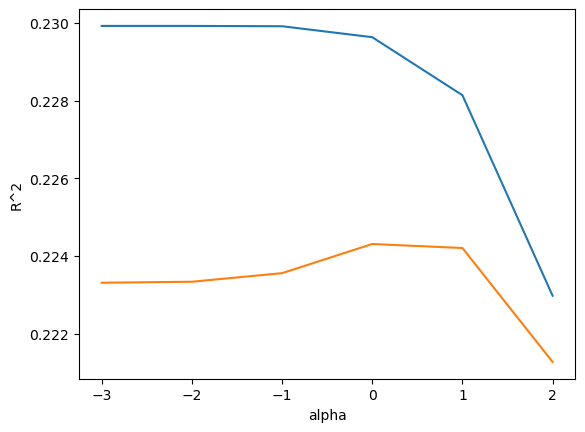

In [20]:
#alpha 값 찾기 / score() 메서드의 결과를 저장할 리스트 만들기
import matplotlib.pyplot as plt
train_score=[ ]
test_score=[ ]

#alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델 훈련하고 훈련 세트와 테스트 세트의 점수를 리스트에 저장
alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  #릿지 모델 만들기
  ridge=Ridge(alpha=alpha)
  #릿지 모델 훈련하기
  ridge.fit(train_scaled,train_target)
  #훈련세트와 테스트세트의 점수를 저장하기
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled,test_target))

#그래프 그리기
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [33]:
#릿지 최종 모델 만들기
ridge=Ridge(alpha=1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.2296326497051535
0.22430802347224998


In [34]:
#타깃과 예측한 값 사이의 차이 구하기
from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측을 만든다
test_prediction=ridge.predict(test_input)

#테스트 세트에 대한 평균 절댓값 오차를 계산한다
mae = mean_absolute_error(test_target,test_prediction)
print(mae)

0.324646906474569


In [35]:
#라쏘 회귀 
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
#라쏘 회귀를 이용한 테스트 세트 점수 확인
print(lasso.score(test_scaled,test_target))

0.0
-8.833390816587183e-07


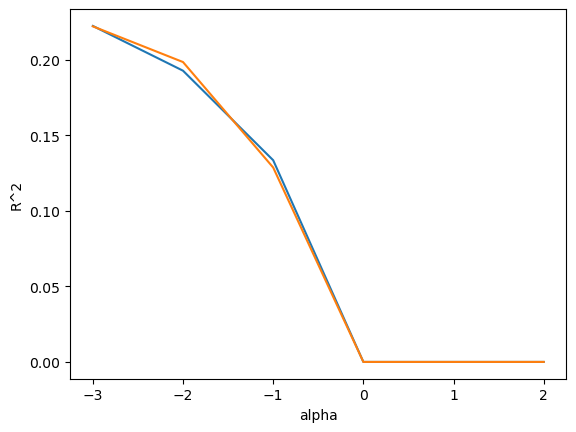

In [36]:
#alpha 값을 바꾸어 가며 라쏘 회귀 돌려보기
train_score=[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  #라쏘 모델 만들기
  lasso=Lasso(alpha=alpha, max_iter=10000)
  #라쏘 모델 훈련하기
  lasso.fit(train_scaled,train_target)
  #훈련 점수와 테스트 점수 저장하기
  train_score.append(lasso.score(train_scaled,train_target))
  test_score.append(lasso.score(test_scaled,test_target))

#train_score와 test_score 리스트를 사용해 그래프 그리기
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [42]:
#라쏘 최종 훈련하기
lasso=Lasso(alpha=0.001)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

#라쏘 모델의 계수 중 0인 것 찾기
print(np.sum(lasso.coef_==0))

0.22239966998874316
0.2221264523368811
577


C:\Users\thddu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Global Sales Price'}, xlabel='Global_Sales', ylabel='Density'>

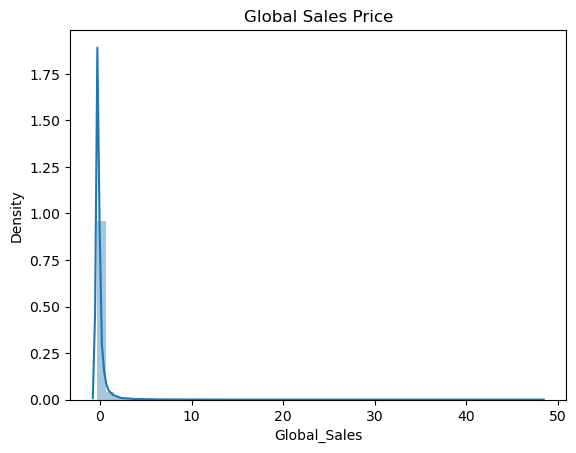

In [22]:
plt.title('Global Sales Price')
sns.distplot(vg_target)

C:\Users\thddu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Log Global Sales'}, xlabel='Global_Sales', ylabel='Density'>

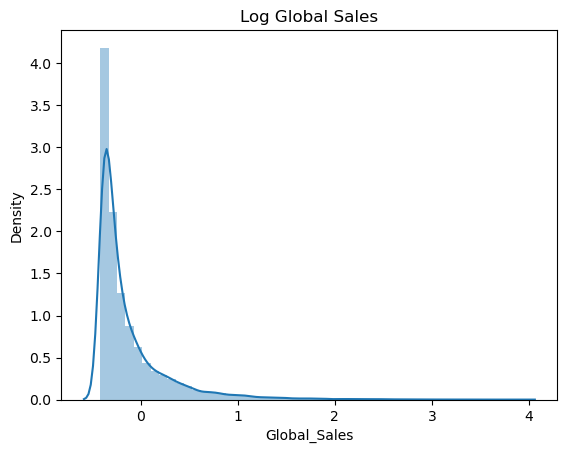

In [23]:
# 결과값을 로그 변환하고 다시 분포도 확인
plt.title('Log Global Sales')

log_Sales = np.log1p(vg_target)
sns.distplot(log_Sales)

In [44]:
# 회귀 계수의 시각화
def get_top_bottom_coef(model) :
    coef = pd.Series(model.coef_, index=vg_input.columns)
    
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    
    return coef_high, coef_low

# 모델별 회귀 계수 시각화 함수
# list 객체로 모델을 입력 받아서
# 모델별로 회귀 계수 상위 10개, 하위 10개 추출해서
# 가로 막대 그래프 형태로 출력
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__ +' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120) # 안쪽, 패딩값
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

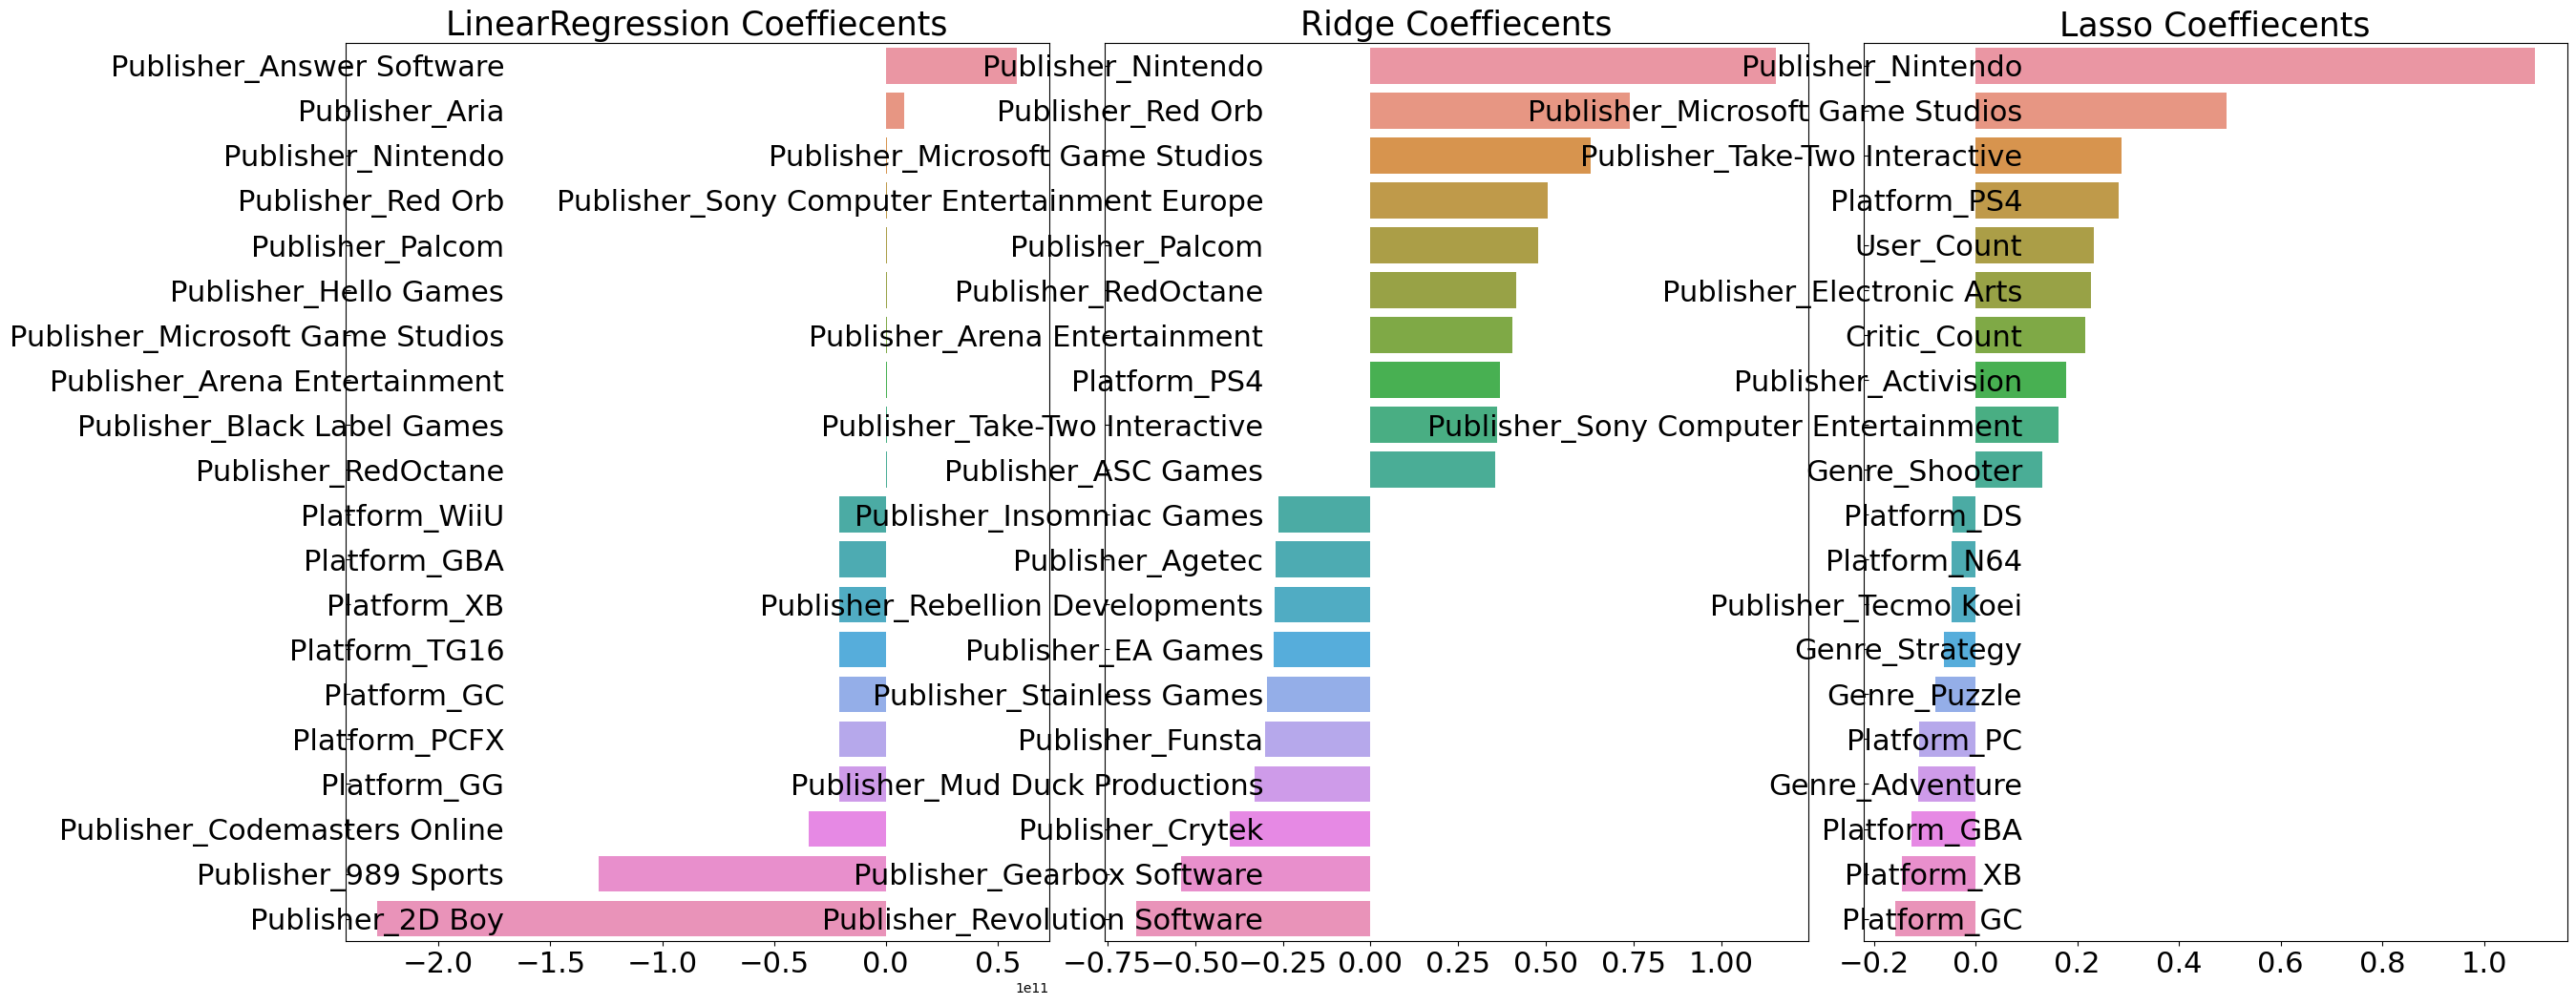

In [45]:
# 일반 선형 회귀
lr_reg = LinearRegression()
lr_reg.fit(train_scaled,train_target)
# 릿찌회귀
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(train_scaled,train_target)
# 라쏘 회귀
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(train_scaled,train_target)
# 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [50]:
from sklearn.metrics import mean_squared_error , r2_score
# 일반 선형 회귀
lr_reg = LinearRegression()
lr_reg.fit(train_scaled,train_target)
#테스트 세트에 대한 예측을 만든다
test_prediction=lr_reg.predict(test_input)
# 실제값과 예측값의 차이를 제곱해서 평균한 평가지표
mse = mean_squared_error(test_target,test_prediction)
# rmse 계산 함수는 사이킷런이 지원하지 않기 때문에 np.sqrt(mse) 사용
rmse = np.sqrt(mse)
r2 = r2_score(test_target,test_prediction) # lr.score() 반환값과 같은 결과
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2))

MSE : 43792587391796625408.000 , RMSE : 6617596798.823
Variance score : -44967351232054468608.000


In [51]:
from sklearn.metrics import mean_squared_error , r2_score
# 릿찌회귀
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(train_scaled,train_target)
#테스트 세트에 대한 예측을 만든다
test_prediction=ridge_reg.predict(test_input)
# 실제값과 예측값의 차이를 제곱해서 평균한 평가지표
mse = mean_squared_error(test_target,test_prediction)
# rmse 계산 함수는 사이킷런이 지원하지 않기 때문에 np.sqrt(mse) 사용
rmse = np.sqrt(mse)
r2 = r2_score(test_target,test_prediction) # lr.score() 반환값과 같은 결과
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2))

MSE : 0.755 , RMSE : 0.869
Variance score : 0.224


In [49]:
from sklearn.metrics import mean_squared_error , r2_score
# 라쏘 회귀
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(train_scaled,train_target)
#테스트 세트에 대한 예측을 만든다
test_prediction=lasso_reg.predict(test_input)
# 실제값과 예측값의 차이를 제곱해서 평균한 평가지표
mse = mean_squared_error(test_target,test_prediction)
# rmse 계산 함수는 사이킷런이 지원하지 않기 때문에 np.sqrt(mse) 사용
rmse = np.sqrt(mse)
r2 = r2_score(test_target,test_prediction) # lr.score() 반환값과 같은 결과
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2))

MSE : 0.758 , RMSE : 0.870
Variance score : 0.222


## 회귀트리 시도

In [177]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0, n_estimators=1000, max_depth=4)
neg_mse_scores = cross_val_score(rf, train_scaled, train_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [-1.49 -0.52 -0.46 -0.63 -0.59]
 5 교차 검증의 개별 RMSE scores :  [1.22 0.72 0.68 0.8  0.77]
 5 교차 검증의 평균 RMSE : 0.837 


In [179]:
from sklearn.metrics import mean_squared_error , r2_score
#테스트 세트에 대한 예측을 만든다
rf.fit(train_scaled, train_target)
test_prediction=rf.predict(test_input)
# 실제값과 예측값의 차이를 제곱해서 평균한 평가지표
mse = mean_squared_error(test_target,test_prediction)
# rmse 계산 함수는 사이킷런이 지원하지 않기 때문에 np.sqrt(mse) 사용
rmse = np.sqrt(mse)
r2 = r2_score(test_target,test_prediction) # lr.score() 반환값과 같은 결과
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2))

MSE : 0.712 , RMSE : 0.844
Variance score : 0.269


In [52]:
# RandomizedSearchCV로 최적 파라미터 찾기
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)
max_depth = np.random.randint(5, 30, 10)
max_features = np.random.uniform(.3, 1., 10)
param_distributions = {'max_depth': max_depth, 'max_features': max_features}
regressor = RandomizedSearchCV(rf, param_distributions, random_state = 42, n_iter = 10, scoring = None, cv = 5, verbose = 2)
regressor.fit(train_scaled, train_target)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......max_depth=16, max_features=0.7267104658523488; total time=  21.3s
[CV] END ......max_depth=16, max_features=0.7267104658523488; total time=  21.1s
[CV] END ......max_depth=16, max_features=0.7267104658523488; total time=  20.8s
[CV] END ......max_depth=16, max_features=0.7267104658523488; total time=  22.6s
[CV] END ......max_depth=16, max_features=0.7267104658523488; total time=  21.7s
[CV] END ......max_depth=24, max_features=0.7267104658523488; total time=  29.2s
[CV] END ......max_depth=24, max_features=0.7267104658523488; total time=  30.1s
[CV] END ......max_depth=24, max_features=0.7267104658523488; total time=  27.4s
[CV] END ......max_depth=24, max_features=0.7267104658523488; total time=  28.9s
[CV] END ......max_depth=24, max_features=0.7267104658523488; total time=  42.3s
[CV] END ......max_depth=28, max_features=0.5361006919168997; total time=  43.5s
[CV] END ......max_depth=28, max_features=0.5361

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   param_distributions={'max_depth': array([19, 24, 29, 17, 11, 24, 10, 28, 16, 24]),
                                        'max_features': array([0.53610069, 0.81959974, 0.36906198, 0.72671047, 0.47722522,
       0.58712008, 0.89731369, 0.65366345, 0.94347837, 0.91025311])},
                   random_state=42, verbose=2)

In [53]:
# r2 값 구하기
y_predict = regressor.predict(test_scaled)
r2_score(test_target, y_predict)

0.39957745116986865

In [34]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

estimators = [DecisionTreeRegressor(random_state = 42),
              RandomForestRegressor(random_state = 42)]
              #GradientBoostingRegressor(random_state = 42)]
estimators

[DecisionTreeRegressor(random_state=42),
 RandomForestRegressor(random_state=42)]

In [35]:
results = []
for estimator in estimators:
    result = estimator.__class__.__name__
    results.append(result)
pd.DataFrame(results)

,0
0,DecisionTreeRegressor
1,RandomForestRegressor


In [37]:
results = []
for estimator in estimators:
    result = []
    max_detph = np.random.randint(5, 30, 10)
    max_features = np.random.uniform(0.3, 1.0, 10)
    param_distributions = {'max_depth': max_detph, 'max_features': max_features}
    #if estimator.__class__.__name__ != 'DecisionTreeRegressor':
    #    n_estimators = np.random.randint(100, 500, 10)
    #    param_distributions['n_estimators'] = n_estimators
    regressor = RandomizedSearchCV(estimator, param_distributions, n_iter = 10,
                                   cv = 5, verbose = 2, random_state = 42)
    regressor.fit(train_scaled, train_target)
    
    result.append(estimator.__class__.__name__) ## 모델 명
    result.append(regressor.best_params_) ## 최적 파라미터
    result.append(regressor.best_estimator_) ## 최적 모델
    result.append(regressor.best_score_) ## 최적 모델의 평균 점수
    result.append(regressor.cv_results_) ## 학습 과정에 대한 Info
    
    results.append(result) ## 종합적

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .......max_depth=12, max_features=0.640452559819817; total time=   0.4s
[CV] END .......max_depth=12, max_features=0.640452559819817; total time=   0.5s
[CV] END .......max_depth=12, max_features=0.640452559819817; total time=   0.5s
[CV] END .......max_depth=12, max_features=0.640452559819817; total time=   0.6s
[CV] END .......max_depth=12, max_features=0.640452559819817; total time=   0.6s
[CV] END ........max_depth=5, max_features=0.640452559819817; total time=   0.3s
[CV] END ........max_depth=5, max_features=0.640452559819817; total time=   0.3s
[CV] END ........max_depth=5, max_features=0.640452559819817; total time=   0.4s
[CV] END ........max_depth=5, max_features=0.640452559819817; total time=   0.3s
[CV] END ........max_depth=5, max_features=0.640452559819817; total time=   0.3s
[CV] END ......max_depth=26, max_features=0.5741689113624531; total time=   0.8s
[CV] END ......max_depth=26, max_features=0.5741

In [40]:
df_cv = pd.DataFrame(results)
df_cv.columns = ['model', 'params', 'estimator', 'score', 'cv_result']
df_cv

,model,params,estimator,score,cv_result
0,DecisionTreeRegressor,"{'max_features': 0.4791522147033549, 'max_dept...","DecisionTreeRegressor(max_depth=7, max_feature...",0.212261,"{'mean_fit_time': [0.5748126029968261, 0.39354..."
1,RandomForestRegressor,"{'max_features': 0.578526202154326, 'max_depth...","(DecisionTreeRegressor(max_depth=24, max_featu...",0.358118,"{'mean_fit_time': [42.697272539138794, 34.8561..."


In [41]:
best_estimator = df_cv.loc[1, 'estimator']
best_estimator

RandomForestRegressor(max_depth=24, max_features=0.578526202154326,
                      random_state=42)

In [42]:
# 가장 성능이 좋았던 랜덤포레스트의 best estimator를 최적 모델로 넣어줌
best_estimator.fit(train_scaled, train_target)

RandomForestRegressor(max_depth=24, max_features=0.578526202154326,
                      random_state=42)

In [53]:
# r2 값 구하기
y_predict = best_estimator.predict(test_scaled)
r2_score(test_target, y_predict)

0.3609615069197111

## XGB 회귀 시도

In [5]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error , r2_score

xgb = XGBRegressor()
xgb.fit(train_input,train_target)

# r2 값 구하기
y_predict = xgb.predict(test_input)
r2_score(test_target, y_predict)

0.34167948221248556

In [6]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb = XGBRegressor()

parameters = {
    'max_depth': [3, 7],
    'n_estimators': [100], # 'n_estimators': [500, 1000]을 하고 싶었으나 너무 오래돌아가서 기본값인 100으로!
    'learning_rate': [0.03, 0.05, 0.07, 0.1],
    'colsample_bytree': [0.5, 0.7],
    'subsample': [0.5, 0.7, 0.8],
    'min_child_weight': [1, 5],
    'random_sate':[2],
    'n_thread': [4], 
}

xgb_grid = GridSearchCV(xgb, parameters, cv=5, n_jobs=5, verbose=5)
xgb_grid.fit(train_input,train_target)
scores = pd.DataFrame(xgb_grid.cv_results_)
scores[['params','mean_test_score', 'rank_test_score', 'split0_test_score','split1_test_score', 'split2_test_score']]

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[09:32:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_thread", "random_sate" } are not used.

0.38436632406545657
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'n_thread': 4, 'random_sate': 2, 'subsample': 0.8}


In [8]:
from sklearn.metrics import accuracy_score

xgbBest = xgb_grid.best_estimator_
scores = pd.DataFrame(xgb_grid.cv_results_)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_columns', 21)
# scores.info()

print(scores.sort_values(by=scores.columns[20], ascending=True).head(10))

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
92      41.937612      0.354966         0.134016        0.007573   
80      39.749074      0.066413         0.125227        0.008733   
32      29.819623      0.122617         0.128326        0.009010   
68      39.503875      0.103606         0.120982        0.005709   
44      30.897601      0.263796         0.118768        0.008118   
20      29.939004      0.231240         0.127447        0.015149   
91      43.474260      0.273499         0.132828        0.019844   
79      41.730861      0.168749         0.127098        0.012757   
67      41.592457      0.312458         0.125077        0.004168   
56      43.813966      0.340325         0.187581        0.043874   

   param_colsample_bytree param_learning_rate param_max_depth  \
92                    0.7                 0.1               7   
80                    0.7                0.07               7   
32                    0.5                0.07           

In [10]:
xgbBest = xgb_grid.best_estimator_
xgb_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, n_thread=4, num_parallel_tree=None,
             predictor=None, ...)

In [13]:
xgbBest.fit(train_input,train_target)

# r2 값 구하기
y_predict = xgbBest.predict(test_input)
r2_score(test_target, y_predict)

[09:46:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_thread", "random_sate" } are not used.



0.4576702163868068

### 급하게 (유사)rmse 값 구하기

In [8]:
from xgboost import XGBRegressor
xgbBest = XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=1, monotone_constraints=None,
             n_estimators=100, n_jobs=None, n_thread=4, num_parallel_tree=None,
             predictor=None)

In [11]:
xgbBest.fit(train_input,train_target)
from sklearn.metrics import mean_squared_error , r2_score
# r2 값 구하기
y_predict = xgbBest.predict(test_input)
r2_score(test_target, y_predict)

# 실제값과 예측값의 차이를 제곱해서 평균한 평가지표
mse = mean_squared_error(test_target,y_predict)
# rmse 계산 함수는 사이킷런이 지원하지 않기 때문에 np.sqrt(mse) 사용
rmse = np.sqrt(mse)
r2 = r2_score(test_target,y_predict) # lr.score() 반환값과 같은 결과
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2))

[10:38:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_thread" } are not used.

MSE : 0.578 , RMSE : 0.760
Variance score : 0.406


In [18]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb_grid_best = XGBRegressor(colsample_bytree = 0.7,
                             learning_rate = 0.1,
                             max_depth = 7,
                             min_child_weight = 1,
                             n_estimators = 100,
                             n_thread = 4,
                             subsample = 0.8)

xgb_grid_best.fit(train_input,train_target)
from sklearn.metrics import mean_squared_error , r2_score
# r2 값 구하기
y_predict = xgb_grid_best.predict(test_input)
r2_score(test_target, y_predict)

# 실제값과 예측값의 차이를 제곱해서 평균한 평가지표
mse = mean_squared_error(test_target,y_predict)
# rmse 계산 함수는 사이킷런이 지원하지 않기 때문에 np.sqrt(mse) 사용
rmse = np.sqrt(mse)
r2 = r2_score(test_target,y_predict) # lr.score() 반환값과 같은 결과
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2))

[11:19:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_thread" } are not used.

MSE : 0.528 , RMSE : 0.727
Variance score : 0.458
